# Analysis of Test Metrics

This notebook analyzes the relationship between inventory sums and action sums from test trajectories.

In [1]:
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from glob import glob
import numpy as np
# increase the number of columns displayed
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
# from sklearn import linear_model
# from plotter import *
# from ipywidgets import *
# import statsmodels.api as sm
# from plotter import *
# from matplotlib.ticker import StrMethodFormatter
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from matplotlib.lines import Line2D
# import scipy.stats as stats



In [2]:
def load_metrics_files(date=None, filename=None, base_path='../metrics/test_trajectories'):
    """
    Load metrics files from the specified path
    
    Args:
        date (str): Date in format 'YYYY_MM_DD'. If None, uses latest date
        filename (str, optional): Specific filename to load. If None, loads latest file from date
        base_path (str): Base path for metrics files
    """
    if date is None:
        # Get all date folders and select the latest
        date_folders = glob(os.path.join(base_path, '*_*_*'))
        if not date_folders:
            raise ValueError("No date folders found")
        date = max(os.path.basename(folder) for folder in date_folders)
    
    # Construct path with date
    date_path = os.path.join(base_path, date)
    
    if filename:
        # Load specific file
        metrics_files = [os.path.join(date_path, filename)]
    else:
        # Find all CSV files for the date and get the latest one
        metrics_files = glob(os.path.join(date_path, '**', '*_test_metrics.csv'), recursive=True)
        if not metrics_files:
            raise ValueError(f"No metrics files found for date {date}")
        metrics_files = [max(metrics_files, key=os.path.getctime)]
    
    # Read and concatenate all CSV files
    dfs = []
    for file_path in metrics_files:
        if os.path.exists(file_path):
            print(f"Loading metrics from: {file_path}")
            df = pd.read_csv(file_path)
            dfs.append(df)
        else:
            print(f"File not found: {file_path}")
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()



# Load specific file from specific date
# df = load_metrics_files(date='2024_02_14', filename='model123_test_metrics.csv')

# Load latest file from latest date
# df = load_metrics_files()

In [ ]:
# Example usage:
# Load latest file from specific date
# df = load_metrics_files(date='2025_02_14')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739983192_910_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739983192_74_test_metrics.csv')
df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739989165_590_test_metrics.csv')
# sort by batch_idx then by time_step
df = df.sort_values(by=['batch_idx', 'time_step'])
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739815253_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739810390_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739776323_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739779365_test_metrics.csv')
# df = load_metrics_files(date='2025_02_17', filename='one_store_fixed_costs/hybrid_policy/1739776205_test_metrics.csv')
# df = load_metrics_files(date='2025_02_16', filename='one_store_fixed_costs/hybrid_policy/1739768092_test_metrics.csv')
# /user/ma4177/Exp_neural/metrics/test_trajectories/2025_02_17/one_store_fixed_costs/hybrid_policy/1739779638_test_metrics.csv
df.head()

len(df)

Loading metrics from: ../metrics/test_trajectories/2025_02_19/one_store_fixed_costs/hybrid_policy/1739989165_590_test_metrics.csv


20000

In [19]:
# compute mean total action sum
print(df['total_action_sum'].mean())
# compute mean total inventory sum
print((df['inventory_sum'].mean()))
# compute mean inventory on hand
print(df['inventory_on_hand'].mean())
# compute mean action
print(df['action'].mean())
# print the min and max of the total inventory sum
print(df['inventory_sum'].min(), df['inventory_sum'].max())
# print the min and max of the total action sum
print(df['total_action_sum'].min(), df['total_action_sum'].max())


10.15095345725978
33.666277789855
23.567244362679496
0.3067
0.0 64.44415283203125
-4.770871964865364e-05 36.288116455078125


In [20]:
#print sample_idx in order
print(df.head())
# sample_idx = df['sample_idx'].sort_values().unique()
# print(sample_idx[:100])
# # count the number of rows where orders are larger than 0.1
# print(df[df['total_action_sum'] > 10].shape[0])
print(df[df['batch_idx'] == 45][['time_step', 'inventory_sum', 'total_action_sum', 'inventory_on_hand', 'action']])
# print(df.head(10))

     time_step  batch_idx  idx  inventory_sum  inventory_on_hand  action  \
50           0          1   50       0.000000           0.000000       1   
150          1          1  150      29.217079          -7.000000       0   
250          2          1  250      18.217033          18.217079       1   
350          3          1  350      37.735233           3.217033       0   
450          4          1  450      21.735188          21.735233       1   

     action_sum  total_action_sum  
50            1         36.217079  
150           0         -0.000046  
250           1         34.518200  
350           0         -0.000046  
450           1         33.619137  
       time_step  inventory_sum  total_action_sum  inventory_on_hand  action
32             0       0.000000         36.217079           0.000000       1
132            1      23.217079         -0.000046         -13.000000       0
232            2      10.217032         36.285797          10.217079       1
332            3   

In [ ]:
df = load_metrics_files(date='2025_02_26', filename='one_store_fixed_costs/hybrid_policy/1740577006_900_test_metrics.csv')
# df = load_metrics_files(date='2025_02_25', filename='one_store_fixed_costs/hybrid_policy/1740535848_304_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739993263_778_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739998287_368_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739997478_625_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739992488_876_test_metrics.csv')
# df = load_metrics_files(date='2025_02_19', filename='one_store_fixed_costs/hybrid_policy/1739989165_590_test_metrics.csv')
# sort by batch_idx then by time_step
df = df.sort_values(by=['batch_idx', 'time_step'])

Loading metrics from: ../metrics/test_trajectories/2025_02_26/one_store_fixed_costs/hybrid_policy/1740577006_900_test_metrics.csv


In [5]:
print(100*(37.13 - 37.06)/37.06)

0.18888289260658467


/tmp/ipykernel_24680/1740526671.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sampled_df, x='inventory_sum', y='total_action_sum', alpha=0.6, palette='bright', s=30)  # Adjusted size of dots


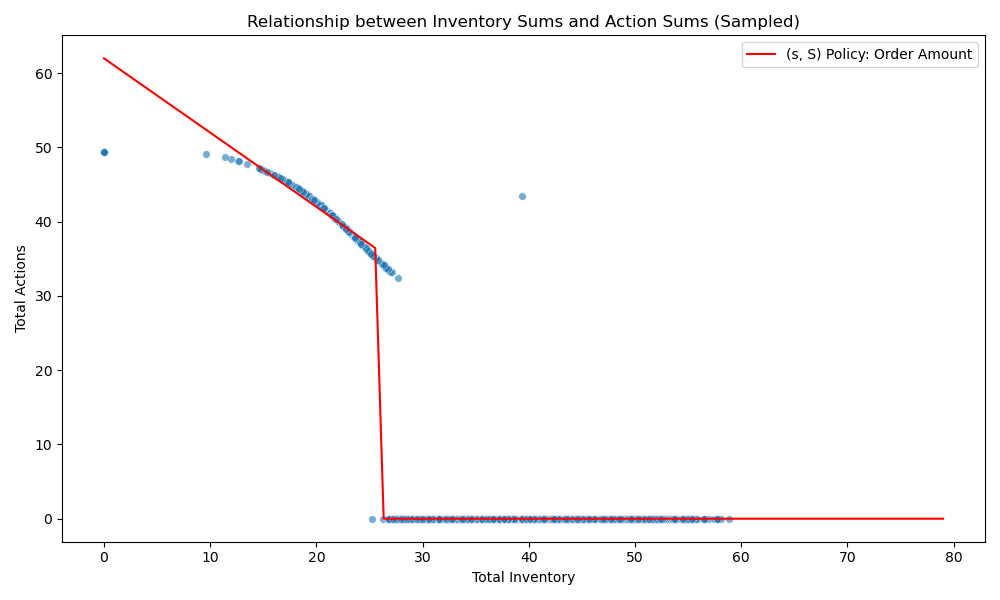

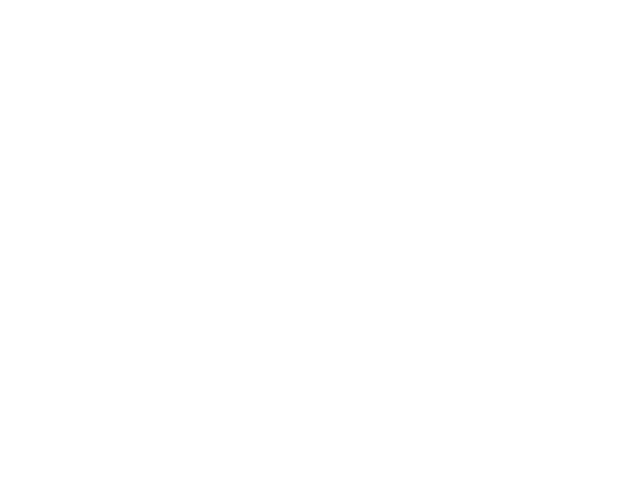

In [6]:
# %matplotlib notebook
%matplotlib ipympl
plt.clf()
# Set up the plot style
plt.figure(figsize=(10, 6))

# Choose a random sub-sample of n points for the plot
n = 1000  # Specify the number of points to sample
sampled_df = df.sample(n=n, random_state=1)  # Randomly sample n points

# Create scatter plot with smaller dots
sns.scatterplot(data=sampled_df, x='inventory_sum', y='total_action_sum', alpha=0.6, palette='bright', s=30)  # Adjusted size of dots
plt.title('Relationship between Inventory Sums and Action Sums (Sampled)')
plt.xlabel('Total Inventory')
plt.ylabel('Total Actions')

# Plot (s, S) policy line
s, S = 26, 62
inventory_range = np.linspace(df['inventory_sum'].min(), df['inventory_sum'].max(), 100)
order_amounts = np.maximum(S - inventory_range, 0) * (inventory_range <= s)

plt.plot(inventory_range, order_amounts, color='red', label='(s, S) Policy: Order Amount')
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_43955/101735505.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


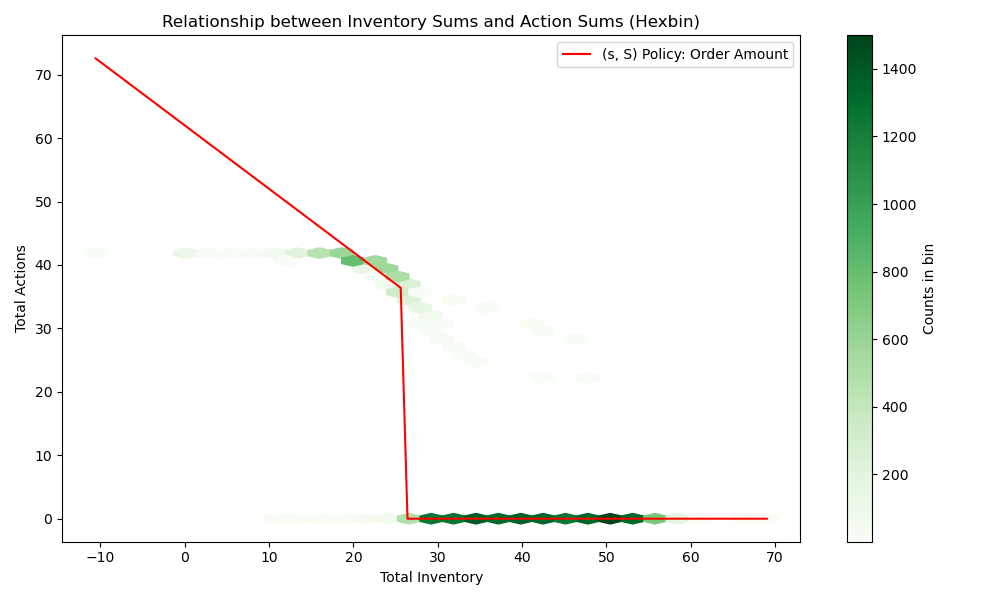

In [28]:
# %matplotlib notebook
%matplotlib ipympl
plt.clf()
# Set up the plot style
plt.figure(figsize=(10, 6))

# Create a hexbin plot to show the density of points
plt.hexbin(df['inventory_sum'], df['total_action_sum'], gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Counts in bin')

# Plot (s, S) policy line
s, S = 26, 62
inventory_range = np.linspace(df['inventory_sum'].min(), df['inventory_sum'].max(), 100)
order_amounts = np.maximum(S - inventory_range, 0) * (inventory_range <= s)

plt.plot(inventory_range, order_amounts, color='red', label='(s, S) Policy: Order Amount')
plt.title('Relationship between Inventory Sums and Action Sums (Hexbin)')
plt.xlabel('Total Inventory')
plt.ylabel('Total Actions')
plt.legend()

plt.tight_layout()
plt.show()

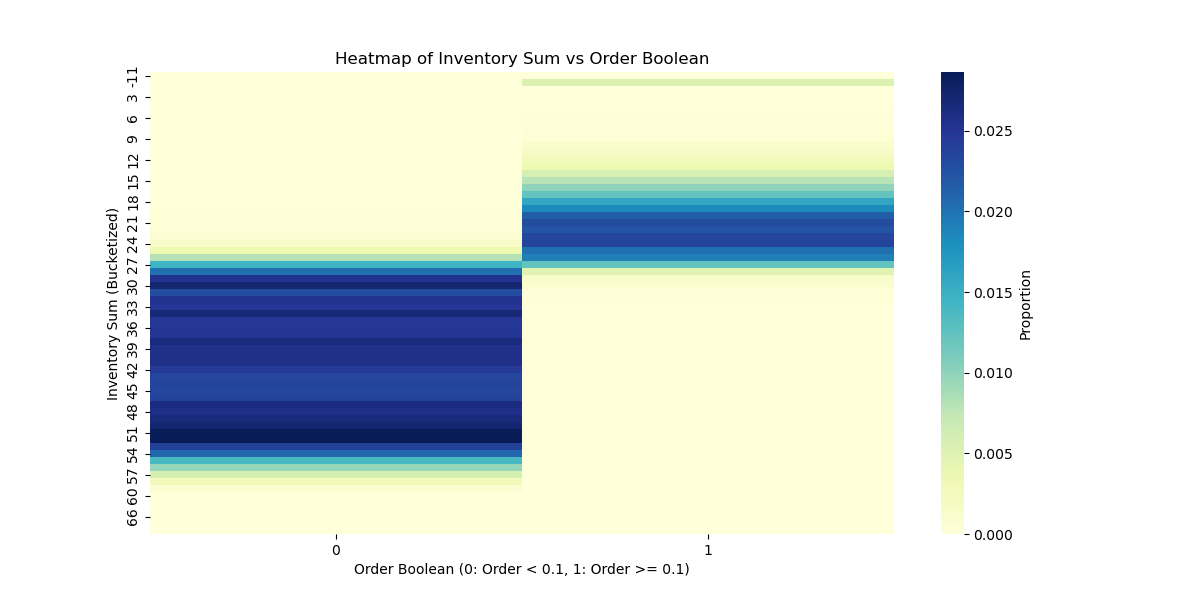

In [14]:
# Create order boolean based on the condition
df['order_boolean'] = (df['total_action_sum'] >= 0.1).astype(int)

# Bucketize inventory_sum into bins of size 1
df['inventory_bucket'] = (df['inventory_sum'] // 1).astype(int)

# Calculate the proportion of pairs for each (inventory_bucket, order_boolean) pair
heatmap_data = df.groupby(['inventory_bucket', 'order_boolean']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.div(heatmap_data.sum().sum(), axis=0)  # Normalize to get proportions across all cells

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Proportion'})  # Remove annotations
plt.title('Heatmap of Inventory Sum vs Order Boolean')
plt.xlabel('Order Boolean (0: Order < 0.1, 1: Order >= 0.1)')
plt.ylabel('Inventory Sum (Bucketized)')
plt.show()


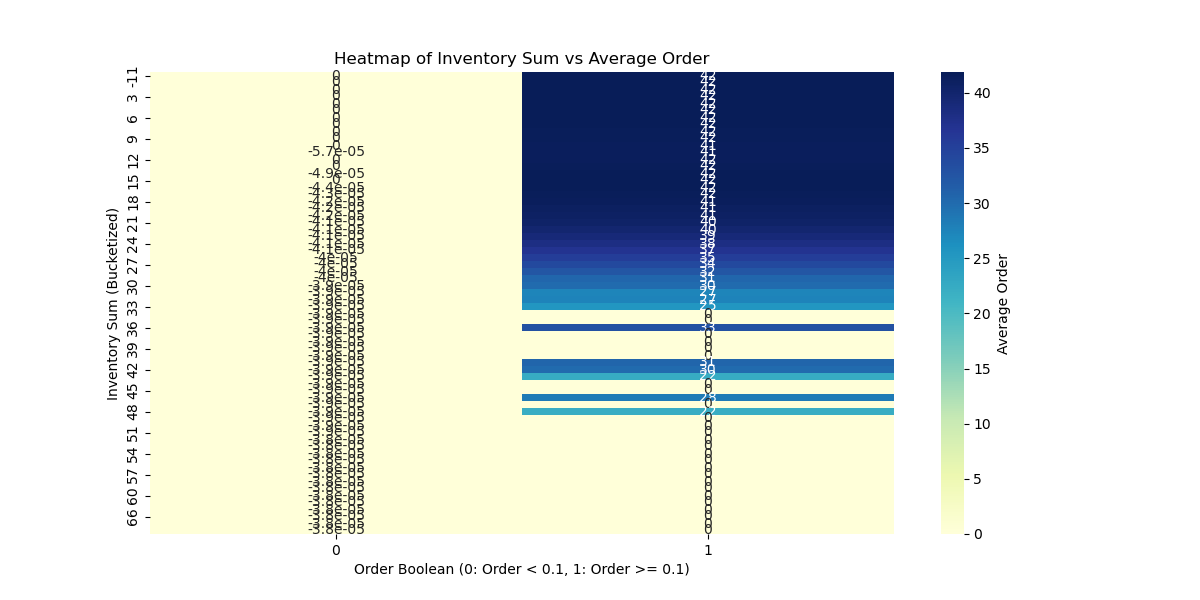

In [15]:
# Calculate the average order for each (inventory_bucket, order_boolean) pair
heatmap_data = df.groupby(['inventory_bucket', 'order_boolean'])['total_action_sum'].mean().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Average Order'})  # Add annotations for average order
plt.title('Heatmap of Inventory Sum vs Average Order')
plt.xlabel('Order Boolean (0: Order < 0.1, 1: Order >= 0.1)')
plt.ylabel('Inventory Sum (Bucketized)')
plt.show()

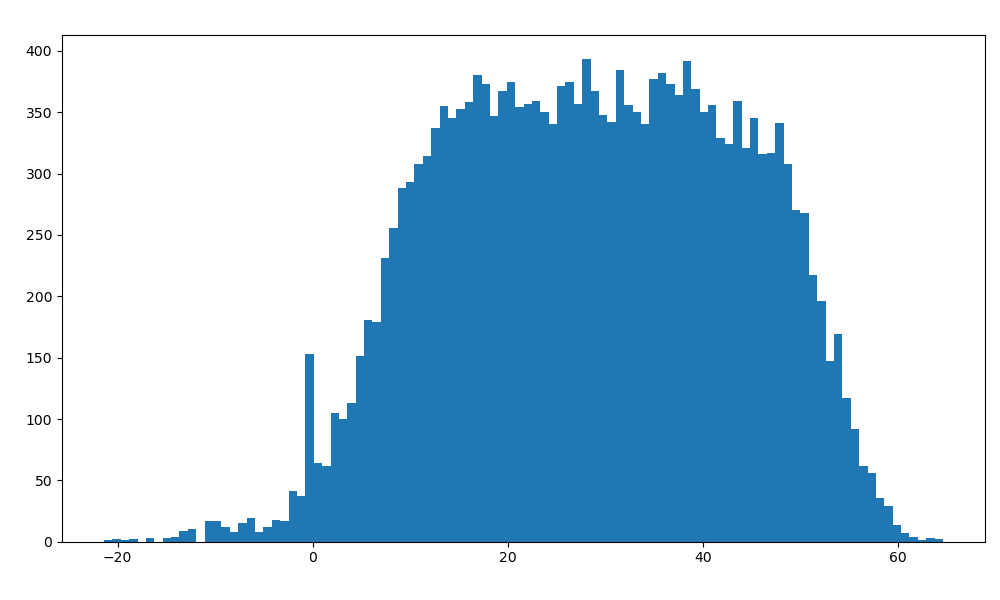

In [33]:
# make a histogram of the inventory_sum
plt.cla()
plt.hist(df['inventory_on_hand'], bins=100)
# plt.hist(df['inventory_sum'], bins=100)
plt.show()
# # make a histogram of the action_sum
# plt.hist(df['total_action_sum'], bins=100)
# plt.show()


In [ ]:
# Calculate correlation
correlation = df.groupby('model_name').apply(lambda x: x['inventory_sum'].corr(x['action_sum']))
print("\nCorrelation between inventory and actions by model:")
print(correlation)

In [ ]:
# Basic statistics
print("\nSummary statistics by model:")
stats = df.groupby('model_name').agg({
    'inventory_sum': ['mean', 'std', 'min', 'max'],
    'action_sum': ['mean', 'std', 'min', 'max']
})
stats